# Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

# Reading Data

In [40]:
path_train = "/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv"
data = pd.read_csv(path_train)

# Exploratory Data

In [41]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [42]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [44]:
data.sample(frac=1)

,N,P,K,temperature,humidity,ph,rainfall,label
181,68,40,19,26.143840,66.205699,6.655426,107.236137,maize
1490,80,18,51,28.053807,91.817588,6.706053,20.765821,muskmelon
2093,63,47,35,26.985822,89.055879,7.432768,193.877871,jute
988,40,18,43,19.386038,86.790585,5.767373,109.913098,pomegranate
2040,66,47,36,24.854414,74.440705,6.572561,175.572958,jute
...,...,...,...,...,...,...,...,...
537,17,57,20,28.506779,45.200945,3.793575,66.176146,mothbeans
1801,37,23,28,25.612944,94.313884,5.740055,224.320676,coconut
426,38,72,21,28.234161,49.442135,5.902103,186.500858,pigeonpeas
1695,27,30,5,32.717485,90.546083,7.656978,113.328978,orange


In [45]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [46]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [47]:
# Get Statistics intuition About Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [48]:
pd.pivot_table(data, index=['label'], aggfunc='mean')

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [49]:
pd.pivot_table(data, index=['label'], aggfunc='max')

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,205,40,145,94.920481,6.499227,124.983162,23.996862
banana,55,120,95,84.978492,6.490074,119.847970,29.908885
blackgram,25,60,80,69.961000,7.775306,74.915595,34.946616
chickpea,85,60,80,19.969789,8.868741,94.781896,20.995022
coconut,35,40,30,99.981876,6.470466,225.632366,29.869083
coffee,35,120,40,69.948073,7.493192,199.473564,27.923744
cotton,25,140,60,84.876690,7.994680,99.931008,25.992374
grapes,205,40,145,83.983517,6.499605,74.915062,41.948657
jute,45,100,60,89.891065,7.488014,199.836291,26.985822


In [50]:
pd.pivot_table(data, index=['label'], aggfunc='min')

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,195,0,120,90.025751,5.514253,100.117344,21.036527
banana,45,80,70,75.031933,5.505394,90.109781,25.010185
blackgram,15,20,55,60.065349,6.500145,60.417903,25.097374
chickpea,75,20,55,14.258040,5.988993,65.113656,17.024985
coconut,25,0,5,90.017345,5.501580,131.090008,25.008724
coffee,25,80,15,50.045570,6.020947,115.156401,23.059519
cotton,15,100,35,75.005393,5.801048,60.653817,22.000851
grapes,195,0,120,80.016394,5.510925,65.010953,8.825675
jute,35,60,35,70.882596,6.002525,150.235524,23.094338


In [51]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (
    data['humidity'] > 50)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (
    data['humidity'] > 30)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (
    data['humidity'] > 50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


# Build Model using Supervised Machine Learning

In [52]:
acc = []
model = []
x = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']
print("Shape of x:", x.shape, "Shape of y:", y.shape)

Shape of x: (2200, 7) Shape of y: (2200,)


In [53]:

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

# Logistic Regression

In [54]:
LogReg = LogisticRegression().fit(x_train, y_train)
predicted_values = LogReg.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



****Making a prediction****

In [55]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
Logprediction = LogReg.predict(data)
print(Logprediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


****Checking Overfitting****

In [56]:
print('LogisticRegression Accuracy on training set: ',
      LogReg.score(x_train, y_train))
print('LogisticRegression Accuracy on test set: ', LogReg.score(x_test, y_test))

LogisticRegression Accuracy on training set:  0.9720779220779221
LogisticRegression Accuracy on test set:  0.95


In [57]:
# Save Model as Pickel
LR_pkl_filename = 'LogisticRegression.pkl'
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

# Decision Tree

In [58]:
DecisionTree = DecisionTreeClassifier(
    criterion="entropy", random_state=42)
DecisionTree.fit(x_train, y_train)
predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.87      0.92        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.93      1.00      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.94      0.97        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       0.95    


****Making a prediction****

In [59]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
DecisionTreeprediction = DecisionTree.predict(data)
print(DecisionTreeprediction)

['coffee']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


****Checking Overfitting****

In [60]:
print('Decision Tree Accuracy on training set: ',
      DecisionTree.score(x_train, y_train))
print('Decision Tree Accuracy on test set: ',
      DecisionTree.score(x_test, y_test))

Decision Tree Accuracy on training set:  1.0
Decision Tree Accuracy on test set:  0.9878787878787879


In [61]:
# Save Model as Pickel
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

# K Nearest Neighbors

([<matplotlib.axis.XTick at 0x7f089821f890>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

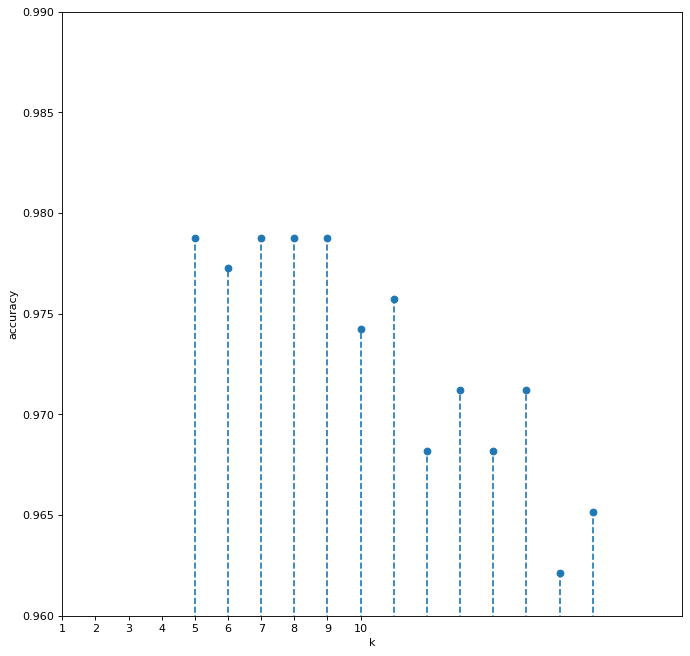

In [62]:
k_range = range(5, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range, 0, scores, linestyle="dashed")
plt.ylim(0.96, 0.99)
plt.xticks([i for i in range(1, 11)])

In [63]:
KNN = KNeighborsClassifier(n_neighbors=9).fit(x_train, y_train)
predicted_values = KNN.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbors')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.97      0.88        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.96      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    


****Making a prediction****

In [64]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
KNNprediction = KNN.predict(data)
print(KNNprediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


****Checking Overfitting****

In [65]:
print('KNN Accuracy on training set: ', KNN.score(x_train, y_train))
print('KNN Accuracy on test set: ', KNN.score(x_test, y_test))

KNN Accuracy on training set:  0.9824675324675325
KNN Accuracy on test set:  0.9787878787878788


In [66]:
# Save Model as Pickel
KNN_pkl_filename = 'KNNprediction.pkl'
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)
KNN_Model_pkl.close()

# Naive Bayes

In [67]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)
predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    


****Making a prediction****

In [68]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
NaiveBayesprediction = NaiveBayes.predict(data)
print(NaiveBayesprediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


****Checking Overfitting****

In [69]:
print('NaiveBayes Accuracy on training set: ',
      NaiveBayes.score(x_train, y_train))
print('NaiveBayes Accuracy on test set: ', NaiveBayes.score(x_test, y_test))

NaiveBayes Accuracy on training set:  0.9948051948051948
NaiveBayes Accuracy on test set:  0.9939393939393939


In [70]:
# Save Model as Pickel
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

# Random Forest

In [71]:
RandomForest = RandomForestClassifier(n_estimators=20, random_state=0)
RandomForest.fit(x_train, y_train)

predicted_values = RandomForest.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RandomForest')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    


****Making a prediction****

In [72]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
RandomForestPrediction = RandomForest.predict(data)
print(RandomForestPrediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


****Checking Overfitting****

In [73]:
print('Random Forest Accuracy on training set: ',
      RandomForest.score(x_train, y_train))
print('Random Forest Accuracy on test set: ',
      RandomForest.score(x_test, y_test))

Random Forest Accuracy on training set:  1.0
Random Forest Accuracy on test set:  0.9954545454545455


In [74]:
# Save Model as Pickel
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
RF_Model_pkl.close()

# Comparing Between Models

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

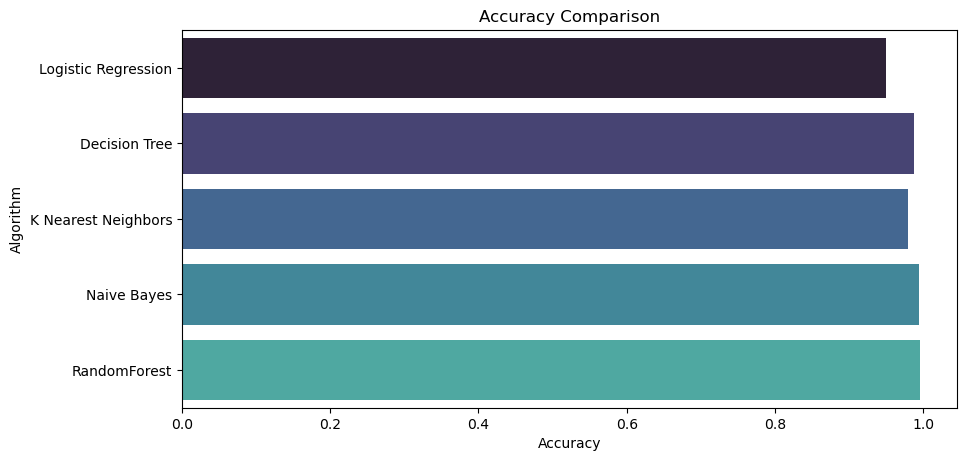

In [75]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette=sns.color_palette("mako"))

In [76]:
# Check Model's Accuracy
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Logistic Regression  :  0.95
Decision Tree  :  0.9878787878787879
K Nearest Neighbors  :  0.9787878787878788
Naive Bayes  :  0.9939393939393939
RandomForest  :  0.9954545454545455


**Random Forest is Best Algorithm**